In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_int64_dtype, is_float_dtype
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, auc, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/ML_course'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Название датасета:** Предсказание ишемической болезни сердца

**Описание:** Набор данных представляет собой информацию о пациентах. Каждый атрибут в нем является потенциальным фактором риска. Существуют как демографические, так и поведенческие и медицинские факторы риска.

**Создание:** Датасет был создан Montu Saw и был получен с помощью пролонгированого исследования сердечно-сосудистой системы жителей города Фрамингем, штат Массачусетс

**Объем:** 60 kB

**Количество строк:** 4328 строк

**Задача:** Цель бинарной классификации - предсказать, есть ли у пациента 10-летний риск развития ишемической болезни сердца (ИБС) в будущем.


Сет включает в себя 14 следующих признаков:

**Age** (количественный) = возраст 

**Education** (порядковый) = образование // пропуски - 105 

**Current smoker** (бинарный) = Курит ли человек(1) или нет(0)  

**cigsPerDay** (количественный) = Количество сигарет выкуренных в среднем за день, считается даже пол сигареты, поэтому значение float // пропуски - 29 

**BPMeds** (бинарный) = Принимал ли человек препараты для улучшения кровяного давления // пропуски - 23

**prevalentStroke** (бинарный) = Был ли у человека инсульт(1) или нет(0)

**prevalentHyp** (бинарный) = является ли человек гипертоником(1) или нет(0)

**diabetes** (бинарный) = есть ли у человека диабет(1) или нет(0)

**totChol** (количественный) = уровень холестерина // пропуски - 50 

**sysBP** (количественный) = среднее систолическое давление

**diaBP** (количественный) = среднее диастолическое давление

**BMI** (количественный) = индекс массы тела // пропуски - 19 

**heartRate** (количественный) = частота сердцебиения(пульс) // пропуски - 1 

**glucose** (количественный) = уровень глюкозы // пропуски - 388




**Целевая метка: TenYearCHD**(Бинарная величина) = указывает у пациента 10-летний риск развития ишемической болезни сердца (1) или нет (0)


**Метрики классификации**

В качестве основных метрик использовали:

// Точность классификации (Accuracy)

// Площадь под кривой ROC (AUC_ROC)


// Матрица путаницы (Confusion matrix)

[[141  21]
 [ 41  51]]
                                       

// Классификационный отчет - показатели precision, recall, f1-score, support
                       

#Датасет

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ML_course/framingham.csv')
hcd_names = ['No', 'Yes']
df.rename({'male': 'sex'}, axis=1, inplace=True)
df.head()


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isna().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.describe

In [ ]:
print(f"GL dataset shape: {df.shape}")

In [ ]:
print(df.to_string())

In [ ]:

df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()

#**Выборка 1**

In [ ]:

df_1.info()


Развели категориальные и числовые признаки

In [ ]:
listOfCategoricalFeatures = []
listOfNumericalFeatures = []

for column in df_1.columns:
    if not (is_float_dtype(df_1[column])):
        print(f'Признак : {column}.')
        print('Значения и их количество в наборе')
        listOfCategoricalFeatures.append(column)
        print(df_1[column].value_counts())
    else:
        listOfNumericalFeatures.append(column)



Построили коррелограмму

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_1.corr(), xticklabels=df_1.corr().columns, yticklabels=df_1.corr().columns, cmap='RdYlGn', center=0, annot=True)
#
# # Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Построили гистрограммы, которые отображют распеделение значений у признаков

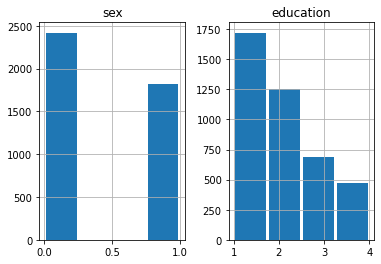

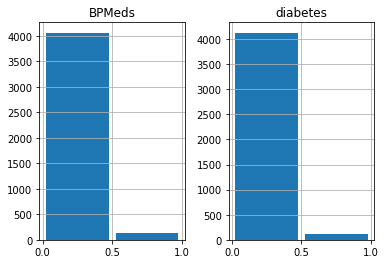

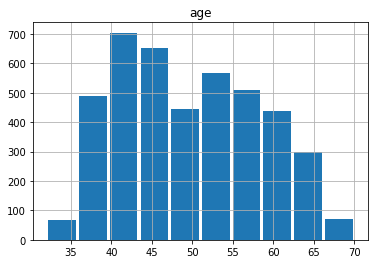

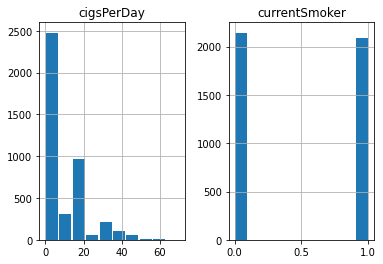

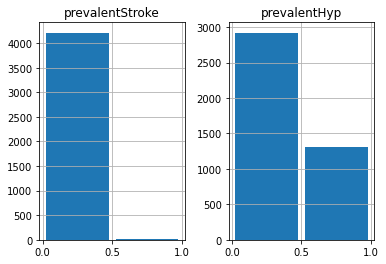

In [ ]:
sex_smhist=df_1.hist(['sex','education'],bins=4, rwidth=0.9)
medshist=df_1.hist(column=['BPMeds', 'diabetes'], bins=2, rwidth=0.9)
agehist=df_1.hist(column='age', rwidth=0.9)
cighist=df_1.hist(['cigsPerDay','currentSmoker'], rwidth=0.9)
prevhist=df_1.hist(['prevalentStroke','prevalentHyp'], bins=2, rwidth=0.9)


- Значения sex и currentSmoker представлены достаточно равномерно
- Значения BPmeds, diabetes, prevalentStroke, prevalentHyp это указывает на что  у данных признаков встречаемость одного показателя значительно выше чем у другого


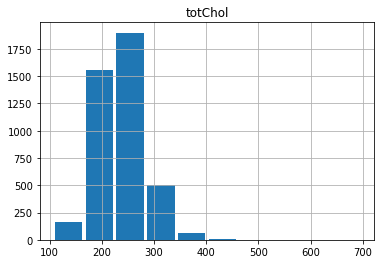

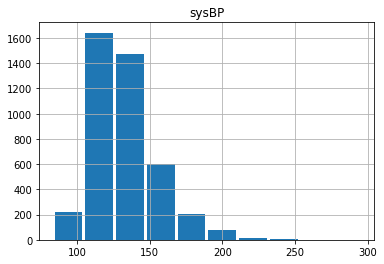

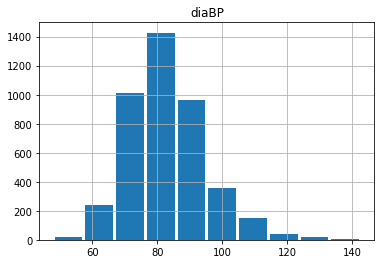

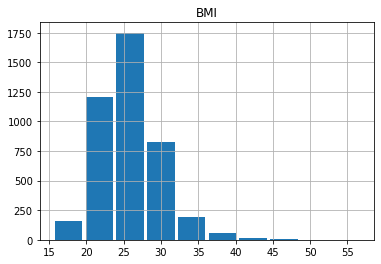

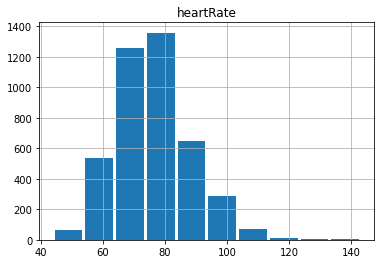

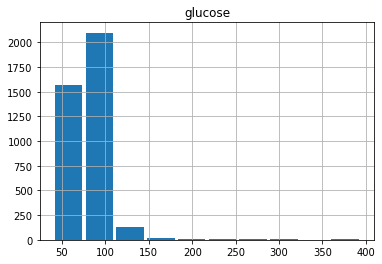

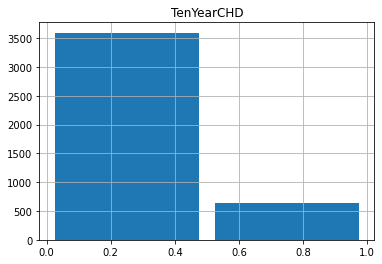

In [ ]:
cholhist=df_1.hist(column='totChol', rwidth=0.9)
syshist=df_1.hist(column='sysBP', rwidth=0.9)
diahist=df_1.hist(column='diaBP', rwidth=0.9)
bmihist=df_1.hist(column='BMI', rwidth=0.9)
hrhist=df_1.hist(column='heartRate', rwidth=0.9)
glhist=df_1.hist(column='glucose', rwidth=0.9)
CHDhist=df_1.hist(column='TenYearCHD', rwidth=0.9, bins=2)

- Гистограмма totChol имеет вид нормального распределения
- Гистограмма sysBP имеет средню левосторонную ассиметрию, это указывает на более частую встречаемость низких значений
- Гистограмма diaBP имеет небольшую левосторонную ассиметрию, это указывает на более частую встречаемость низких значений
- Гистограмма BMI имеет небольшую левосторонную ассиметрию, это указывает на более частую встречаемость низких значений
- Гистограмма heartRate низкие показатели более часто встречаются, однако распределние похоже на нормальное
- У показателя glucose имеются некоторое количество выбросов больших значений
- Выбросы, а также ассимметрия указывают на необходимость отбора данных по перцентилю и удаления некоторых значений
- у целевой метки TenYearCHD Показатель No встречается значительно чаще, что указывает на необходимость балансировки классов

Построили скаттерограммы, которые также отображают распределние признаков

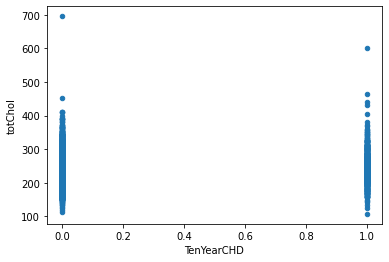

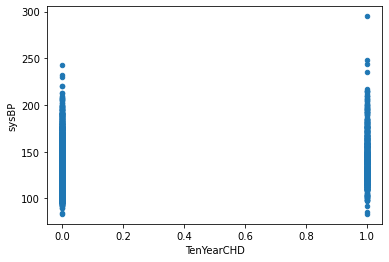

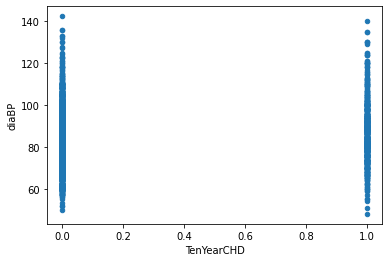

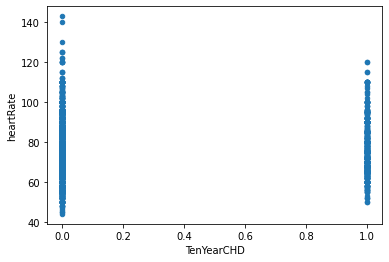

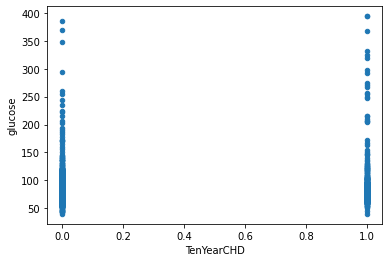

In [ ]:

df_1.plot.scatter(x='TenYearCHD', y='totChol',)
df_1.plot.scatter(x='TenYearCHD', y='sysBP')
df_1.plot.scatter(x='TenYearCHD', y='diaBP')
df_1.plot.scatter(x='TenYearCHD', y='heartRate')
df_1.plot.scatter(x='TenYearCHD', y='glucose')




- Данные скаттерограмм также указывают на наличе значений выбросов и необходимость удаления данных показателей

Установили показатель моды для пропущенных значений признаков



In [ ]:
g = df_1['glucose'].mode()
b = df_1['BPMeds'].mode()
c = df_1['cigsPerDay'].mode()
t = df_1['totChol'].mode()
e = df_1['education'].mode()

print(g, b, c, t, e)

df_1['glucose'] = df_1['glucose'].fillna(75.0).astype(float)
df_1['BPMeds'] = df_1['BPMeds'].fillna(0)
df_1['cigsPerDay'] = df_1['cigsPerDay'].fillna(0.0).astype(float)
df_1['totChol'] = df_1['totChol'].fillna(240.0).astype(float)
df_1['education'] = df_1['education'].fillna(1.0).astype(float)


df_1['BPMeds'] = df_1['BPMeds'].astype(int)
df_1['education']= df_1['education'].astype(int)



0    75.0
dtype: float64 0    0.0
dtype: float64 0    0.0
dtype: float64 0    240.0
dtype: float64 0    1.0
dtype: float64


Провели отбор значений по перцентилю

In [ ]:
for column in listOfNumericalFeatures:
    print(column)
    minLimit = df_1[column].quantile(0.025)
    maxLimit = df_1[column].quantile(0.975)
    print(minLimit, maxLimit)
    print(df_1.shape)
    df_1 = df_1.loc[(df_1[column] >= minLimit) & (df_1[column] <= maxLimit)]

Развели значения целевой метки и признаков

In [ ]:
# Выделим из набора данных вектор признаков и вектор ответов
X_1 = df_1.drop(columns=['TenYearCHD'])
y_1 = df_1['TenYearCHD']

print(f"Features shape: {X_1.shape}")
print(f"Target shape: {y_1.shape}")




Features shape: (3120, 15)
Target shape: (3120,)


Провели дискретизацию SMOTE для балансировки данных

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

column = X_1.columns

print("До балансировки данных")
print(X_1.shape)
print(y_1.value_counts())

std = StandardScaler()
X_std = std.fit_transform(X_1)

os_data_X, os_data_y = os.fit_resample(X_1, y_1)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['TenYearCHD'])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

Создали тренировочную и тестовую выборки

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(os_data_X, os_data_y, test_size=0.3)

print(X_train_1.shape)
print(X_test_1.shape)

(3787, 15)
(1623, 15)


Применяем различные модели

**Baseline модель 1 выборки (Логистическая Регрессия)**

In [ ]:
# Создадим модель логистической регрессии с гиперпараметрами

param_grid = {'C': np.logspace(-4, 4, 50),
'penalty': ['l1', 'l2']}
LogModel =LogisticRegression()
LogModel = GridSearchCV(LogisticRegression(random_state = 10), param_grid, cv = 5, verbose = 0, n_jobs = -1)

# обучение модели
LRE = LogModel.fit(X_train_1, y_train_1)

print(LRE.best_estimator_)

# предсказание ответов для тестовой выборки
answers_pred = LogModel.predict(X_test_1)

In [ ]:
confmat_log=confusion_matrix(y_true=y_test_1,y_pred=answers_pred)
print('Матрица ошибок для логистической регрессии:') 
print(confmat_log) 
specificity_log = confmat_log[1][1]/(confmat_log[1][0] + confmat_log[1][1]) 
sensitivity_log = confmat_log[0][0]/(confmat_log[0][0] + confmat_log[0][1])

print(r'Чувствительность (Логистическая регрессия): %.3f'%sensitivity_log) 
print(r'Специфичность    (Логистическая регрессия): %.3f'%specificity_log) 
probslog = LogModel.predict_proba(X_test_1) 
predslog = probslog[:,1] 
fprlog, tprlog, thresholdTree = roc_curve(y_test_1, predslog) 
roc_auclog = auc(fprlog, tprlog) 
print(r'AUC              (Логистическая регрессия): %.3f'%roc_auclog) 


print(classification_report(y_test_1, answers_pred, target_names=hcd_names))


log_acc_1 = accuracy_score(y_test_1, answers_pred)

Матрица ошибок для логистической регрессии:
[[526 299]
 [247 551]]
Чувствительность (Логистическая регрессия): 0.638
Специфичность    (Логистическая регрессия): 0.690
AUC              (Логистическая регрессия): 0.726
              precision    recall  f1-score   support

          No       0.68      0.64      0.66       825
         Yes       0.65      0.69      0.67       798

    accuracy                           0.66      1623
   macro avg       0.66      0.66      0.66      1623
weighted avg       0.66      0.66      0.66      1623



**SVM c 1 выборкой**

In [ ]:

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
svm = GridSearchCV(SVC(random_state=10), param_grid, refit = True, verbose = 3, n_jobs = -1)

SF = svm.fit(X_train_1, y_train_1)
y_pred_svm = svm.predict(X_test_1)




Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print(classification_report(y_test_1, y_pred_svm, target_names=hcd_names))


confmat=confusion_matrix(y_true=y_test_1,y_pred=y_pred_svm)
print('Матрица ошибок для Опорные вектора:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Опорные вектора): %.3f'%sensitivity) 
print(r'Специфичность    (Опорные вектора): %.3f'%specificity) 

svm_acc_1 = accuracy_score(y_test_1, y_pred_svm)


              precision    recall  f1-score   support

          No       0.95      0.93      0.94       825
         Yes       0.93      0.94      0.93       798

    accuracy                           0.94      1623
   macro avg       0.94      0.94      0.94      1623
weighted avg       0.94      0.94      0.94      1623

Матрица ошибок для Опорные вектора:
[[764  61]
 [ 44 754]]
Чувствительность (Опорные вектора): 0.926
Специфичность    (Опорные вектора): 0.945


**KNN с 1 выборкой**

In [ ]:
grid_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


knn = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 3, verbose = 4, n_jobs = -1)
  
knn.fit(X_train_1, y_train_1)
  
# Calculate the accuracy of the model
print(knn.score(X_test_1, y_test_1))

y_pred_knn = knn.predict(X_test_1)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
0.8656808379544054


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(classification_report(y_test_1, y_pred_knn, target_names=hcd_names))

confmat=confusion_matrix(y_true=y_test_1,y_pred=y_pred_knn)
print('Матрица ошибок для KNN:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (KNN): %.3f'%sensitivity) 
print(r'Специфичность    (KNN): %.3f'%specificity) 
probsKNN = knn.predict_proba(X_test_1) 
predsKNN = probsKNN[:,1] 
fprKNN, tprKNN, thresholdTree = roc_curve(y_test_1, predsKNN) 
roc_aucKNN = auc(fprKNN, tprKNN) 
print(r'AUC              (KNN): %.3f'%roc_aucKNN)

knn_acc_1 = accuracy_score(y_test_1, y_pred_knn)
print(accuracy_score(y_test_1, y_pred_knn))

              precision    recall  f1-score   support

          No       0.93      0.79      0.86       825
         Yes       0.82      0.94      0.87       798

    accuracy                           0.87      1623
   macro avg       0.87      0.87      0.87      1623
weighted avg       0.87      0.87      0.87      1623

Матрица ошибок для KNN:
[[655 170]
 [ 48 750]]
Чувствительность (KNN): 0.794
Специфичность    (KNN): 0.940
AUC              (KNN): 0.880
0.8656808379544054



**Decision Tree с 1 выборкой**


In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth' : [8,16,55,80,150,250],
              'criterion' :['gini', 'entropy'],
             }

Tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
  
Tree.fit(X_train_1, y_train_1)
  
# Calculate the accuracy of the model
print(Tree.score(X_test_1, y_test_1))

y_pred_tree = Tree.predict(X_test_1)




Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.7196549599507086


In [ ]:


confmat=confusion_matrix(y_true=y_test_1,y_pred=y_pred_tree)
print('Матрица ошибок для Decision Tree:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Decision Tree): %.3f'%sensitivity) 
print(r'Специфичность    (Decision Tree): %.3f'%specificity) 
probs = Tree.predict_proba(X_test_1) 
preds = probs[:,1] 
fprTree, tprTree, thresholdTree = roc_curve(y_test_1, preds) 
roc_aucTree = auc(fprTree, tprTree) 
print(r'AUC              (Decision Tree): %.3f'%roc_aucTree)

print(classification_report(y_test_1, y_pred_tree, target_names=hcd_names))


tree_acc_1 = accuracy_score(y_test_1, y_pred_tree)
print(accuracy_score(y_test_1, y_pred_tree))

**Gradient Boosting 1 выборки**

In [ ]:

grid_param = {'n_estimators':[50,100,150,200],'max_depth':[4,12,16,28]}

modelGB_1 = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param, verbose=True, n_jobs = -1)


modelGB_1.fit(X_train_1, y_train_1)
print(modelGB_1.score(X_test_1, y_test_1))

y_pred_GB_1 = modelGB_1.predict(X_test_1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9229821318545902


In [ ]:

confmat=confusion_matrix(y_true=y_test_1,y_pred=y_pred_GB_1)
print('Матрица ошибок для Gradient Boosting:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Gradient Boosting): %.3f'%sensitivity) 
print(r'Специфичность    (Gradient Boosting): %.3f'%specificity) 
probs = modelGB_1.predict_proba(X_test_1) 
preds = probs[:,1] 
fprGB, tprGB, thresholdTree = roc_curve(y_test_1, preds) 
roc_aucGB = auc(fprGB, tprGB) 
print(r'AUC              (Gradient Boosting): %.3f'%roc_aucGB)

print(classification_report(y_test_1, y_pred_GB_1, target_names=hcd_names))

GB_acc_1 = accuracy_score(y_test_1, y_pred_GB_1)
print(accuracy_score(y_test_1, y_pred_GB_1))

Матрица ошибок для Gradient Boosting:
[[768  57]
 [ 68 730]]
Чувствительность (Gradient Boosting): 0.931
Специфичность    (Gradient Boosting): 0.915
AUC              (Gradient Boosting): 0.973
              precision    recall  f1-score   support

          No       0.92      0.93      0.92       825
         Yes       0.93      0.91      0.92       798

    accuracy                           0.92      1623
   macro avg       0.92      0.92      0.92      1623
weighted avg       0.92      0.92      0.92      1623

0.9229821318545902


**Bagging 1 выборки**

In [ ]:
bc_params = {"base_estimator__n_neighbors": [2,5,10],
          'bootstrap_features': [False, True],
          'n_estimators': [5, 150],
          }


modelBAG_1 = GridSearchCV(BaggingClassifier(KNeighborsClassifier()), bc_params, cv=5, verbose=1, n_jobs = -1)


modelBAG_1.fit(X_train_1, y_train_1)
print(modelBAG_1.score(X_test_1, y_test_1))

y_pred_BAG_1 = modelBAG_1.predict(X_test_1)



Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8570548367221196


In [ ]:

confmat=confusion_matrix(y_true=y_test_1,y_pred=y_pred_BAG_1)
print('Матрица ошибок для Bagging:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Bagging): %.3f'%sensitivity) 
print(r'Специфичность    (Bagging): %.3f'%specificity) 
probs = modelBAG_1.predict_proba(X_test_1) 
preds = probs[:,1] 
fprBAG, tprBAG, thresholdTree = roc_curve(y_test_1, preds) 
roc_aucBAG = auc(fprBAG, tprBAG) 
print(r'AUC              (Bagging): %.3f'%roc_aucBAG)

print(classification_report(y_test_1, y_pred_BAG_1, target_names=hcd_names))

BAG_acc_1 = accuracy_score(y_test_1, y_pred_BAG_1)
print(accuracy_score(y_test_1, y_pred_BAG_1))

Матрица ошибок для Bagging:
[[626 199]
 [ 33 765]]
Чувствительность (Bagging): 0.759
Специфичность    (Bagging): 0.959
AUC              (Bagging): 0.962
              precision    recall  f1-score   support

          No       0.95      0.76      0.84       825
         Yes       0.79      0.96      0.87       798

    accuracy                           0.86      1623
   macro avg       0.87      0.86      0.86      1623
weighted avg       0.87      0.86      0.86      1623

0.8570548367221196


**Stacking 1 выборки**

In [ ]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
modelSTC_1 = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())

params = {'dt__max_depth': [10, 50, 150],
          'dt__criterion':['gini', 'entropy'],
          'lr__C': [0.1, 1, 10, 100],
          }

modelSTC_1 = GridSearchCV(estimator=modelSTC_1, param_grid=params, cv=5, verbose=1, n_jobs= -1)

modelSTC_1.fit(X_train_1, y_train_1)
print(modelSTC_1.score(X_test_1, y_test_1))

y_pred_STC_1 = modelSTC_1.predict(X_test_1)


In [ ]:
confmat=confusion_matrix(y_true=y_test_1,y_pred=y_pred_STC_1)
print('Матрица ошибок для Stacking:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Stacking): %.3f'%sensitivity) 
print(r'Специфичность    (Stacking): %.3f'%specificity) 
probs = modelSTC_1.predict_proba(X_test_1) 
preds = probs[:,1] 
fprSTC, tprSTC, thresholdTree = roc_curve(y_test_1, preds) 
roc_aucSTC = auc(fprSTC, tprSTC) 
print(r'AUC              (Stacking): %.3f'%roc_aucSTC)


print(classification_report(y_test_1, y_pred_STC_1, target_names=hcd_names))

STC_acc_1 = accuracy_score(y_test_1, y_pred_STC_1)
print(accuracy_score(y_test_1, y_pred_STC_1))

Матрица ошибок для Stacking:
[[621 204]
 [208 590]]
Чувствительность (Stacking): 0.753
Специфичность    (Stacking): 0.739
AUC              (Stacking): 0.792
              precision    recall  f1-score   support

          No       0.75      0.75      0.75       825
         Yes       0.74      0.74      0.74       798

    accuracy                           0.75      1623
   macro avg       0.75      0.75      0.75      1623
weighted avg       0.75      0.75      0.75      1623

0.7461491065927295


Графики ROC для моделей


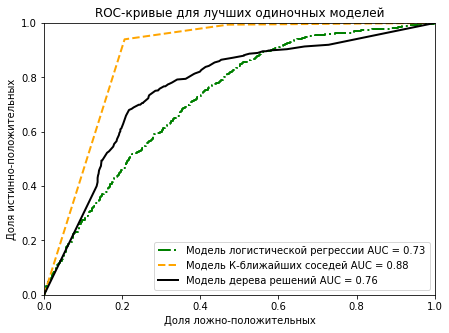

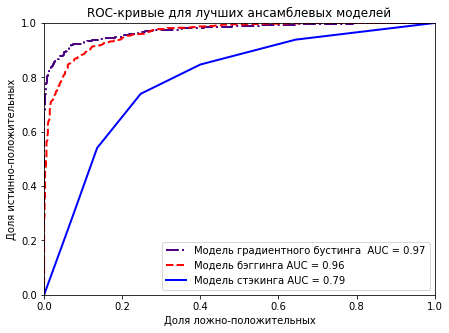

In [ ]:
plt.figure(figsize=(7,5))
plt.title('ROC-кривые для лучших одиночных моделей')
plt.plot(fprlog, tprlog, 'b', color = 'green', linestyle = '-.',
linewidth = 2, label = 'Модель логистической регрессии AUC = %0.2f' % roc_auclog)
plt.plot(fprKNN, tprKNN, 'b', color = 'orange', linestyle = '--',
linewidth = 2, label = 'Модель К-ближайших соседей AUC = %0.2f' % roc_aucKNN)
plt.plot(fprTree, tprTree, 'b', color = 'black', linestyle = '-',
linewidth = 2, label = 'Модель дерева решений AUC = %0.2f' % roc_aucTree)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Доля истинно-положительных')
plt.xlabel('Доля ложно-положительных')

plt.figure(figsize=(7,5))
plt.title('ROC-кривые для лучших ансамблевых моделей')
plt.plot(fprGB, tprGB, 'b', color = 'indigo', linestyle = '-.',
linewidth = 2, label = 'Модель градиентного бустинга  AUC = %0.2f' % roc_aucGB)
plt.plot(fprBAG, tprBAG, 'b', color = 'red', linestyle = '--',
linewidth = 2, label = 'Модель бэггинга AUC = %0.2f' % roc_aucBAG)
plt.plot(fprSTC, tprSTC, 'b', color = 'blue', linestyle = '-',
linewidth = 2, label = 'Модель стэкинга AUC = %0.2f' % roc_aucSTC)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Доля истинно-положительных')
plt.xlabel('Доля ложно-положительных')
plt.show()

#**Работа со 2 выборкой**


In [ ]:

df_2.isna().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Удалили пропущенные признаки

In [ ]:
df_2.dropna(inplace=True)

df_2['BPMeds'] = df_2['BPMeds'].astype(int)
df_2['education']= df_2['education'].astype(int)


In [ ]:
df_2.isna().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Развели категориальные и числовые признаки, а также отобрали значения по перцентилю

In [ ]:
df_2.info()

listOfCategoricalFeatures = []
listOfNumericalFeatures = []

for column in df_2.columns:
    if not (is_float_dtype(df_2[column])):
        print(f'Признак : {column}.')
        print('Значения и их количество в наборе')
        listOfCategoricalFeatures.append(column)
        print(df_2[column].value_counts())
    else:
        listOfNumericalFeatures.append(column)

for column in listOfNumericalFeatures:
    print(column)
    minLimit = df_2[column].quantile(0.025)
    maxLimit = df_2[column].quantile(0.975)
    print(minLimit, maxLimit)
    print(df_2.shape)
    df_2 = df_2.loc[(df_2[column] >= minLimit) & (df_2[column] <= maxLimit)]

Разделили целевую метку и признаки

In [ ]:
# Выделим из набора данных вектор признаков и вектор ответов
X_2 = df_2.drop(columns=['TenYearCHD'])
y_2 = df_2['TenYearCHD']

print(f"Features shape: {X_2.shape}")
print(f"Target shape: {y_2.shape}")


Features shape: (2702, 15)
Target shape: (2702,)


Провели передискретизацию с заменой для балансировки данных

In [ ]:

column = X_2.columns

print("До балансировки данных")
print(X_2.shape)
print(y_2.value_counts())

x_resampled = resample(X_2[y_2==1], n_samples=X_2[y_2==0].shape[0], random_state=1000)

x_Z = np.concatenate((X_2[y_2==0], x_resampled))
y_Z = np.concatenate((y_2[y_2==0], np.ones(shape=(X_2[y_2==0].shape[0],), dtype=np.int32)))


До балансировки данных
(2702, 15)
0    2341
1     361
Name: TenYearCHD, dtype: int64


Выделили тренировочную и тестовую выборки

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_Z, y_Z, test_size=0.3)

print(X_train_2.shape)
print(X_test_2.shape)

(3277, 15)
(1405, 15)


Применяем модели

**Логистическая регрессия 2 выборка**

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
'penalty': ['l1', 'l2']}
LogModel = GridSearchCV(LogisticRegression(random_state = 10), param_grid, cv = 5, verbose = 0, n_jobs = -1)

# обучение модели
LogModel.fit(X_train_2, y_train_2)

# предсказание ответов для тестовой выборки
answers_pred = LogModel.predict(X_test_2)

In [ ]:
confmat_log=confusion_matrix(y_true=y_test_2,y_pred=answers_pred)
print('Матрица ошибок для логистической регрессии:') 
print(confmat_log) 
specificity_log = confmat_log[1][1]/(confmat_log[1][0] + confmat_log[1][1]) 
sensitivity_log = confmat_log[0][0]/(confmat_log[0][0] + confmat_log[0][1])

print(r'Чувствительность (Логистическая регрессия): %.3f'%sensitivity_log) 
print(r'Специфичность    (Логистическая регрессия): %.3f'%specificity_log) 
probslog = LogModel.predict_proba(X_test_2) 
predslog = probslog[:,1] 
fprlog, tprlog, thresholdTree = roc_curve(y_test_2, predslog) 
roc_auclog = auc(fprlog, tprlog) 
print(r'AUC              (Логистическая регрессия): %.3f'%roc_auclog) 

print(classification_report(y_test_2, answers_pred, target_names=hcd_names))

log_acc_2 = accuracy_score(y_test_2, answers_pred)
print(accuracy_score(y_test_2, answers_pred))

Матрица ошибок для логистической регрессии:
[[471 210]
 [272 452]]
Чувствительность (Логистическая регрессия): 0.692
Специфичность    (Логистическая регрессия): 0.624
AUC              (Логистическая регрессия): 0.722
              precision    recall  f1-score   support

          No       0.63      0.69      0.66       681
         Yes       0.68      0.62      0.65       724

    accuracy                           0.66      1405
   macro avg       0.66      0.66      0.66      1405
weighted avg       0.66      0.66      0.66      1405

0.6569395017793594


**SVC со 2 выборкой**

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
svm = GridSearchCV(SVC(random_state=10), param_grid, refit = True, verbose = 3, n_jobs = -1)

svm.fit(X_train_2, y_train_2)
y_pred_svm = svm.predict(X_test_2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:

print(classification_report(y_test_2, y_pred_svm, target_names=hcd_names))

confmat=confusion_matrix(y_true=y_test_2,y_pred=y_pred_svm)
print('Матрица ошибок для Опорные вектора:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Опорные вектора): %.3f'%sensitivity) 
print(r'Специфичность    (Опорные вектора): %.3f'%specificity) 

svm_acc_2 = accuracy_score(y_test_2, y_pred_svm)
print(accuracy_score(y_test_2, y_pred_svm))

              precision    recall  f1-score   support

          No       0.99      1.00      1.00       681
         Yes       1.00      0.99      1.00       724

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405

Матрица ошибок для Опорные вектора:
[[681   0]
 [  6 718]]
Чувствительность (Опорные вектора): 1.000
Специфичность    (Опорные вектора): 0.992
0.995729537366548


**KNN со 2 выборкой**

In [ ]:
grid_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 3, verbose = 4, n_jobs = -1)
  
knn.fit(X_train_2, y_train_2)
  
# Calculate the accuracy of the model
print(knn.score(X_test_2, y_test_2))

y_pred_knn = knn.predict(X_test_2)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
0.9330960854092527


In [ ]:
print(classification_report(y_test_2, y_pred_knn, target_names=hcd_names))

confmat=confusion_matrix(y_true=y_test_2,y_pred=y_pred_knn)
print('Матрица ошибок для KNN:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (KNN): %.3f'%sensitivity) 
print(r'Специфичность    (KNN): %.3f'%specificity) 
probsKNN = knn.predict_proba(X_test_2) 
predsKNN = probsKNN[:,1] 
fprKNN, tprKNN, thresholdTree = roc_curve(y_test_2, predsKNN) 
roc_aucKNN = auc(fprKNN, tprKNN) 
print(r'AUC              (KNN): %.3f'%roc_aucKNN)

knn_acc_2 = accuracy_score(y_test_2, y_pred_knn)
print(accuracy_score(y_test_2, y_pred_knn))

              precision    recall  f1-score   support

          No       0.99      0.87      0.93       681
         Yes       0.89      1.00      0.94       724

    accuracy                           0.93      1405
   macro avg       0.94      0.93      0.93      1405
weighted avg       0.94      0.93      0.93      1405

Матрица ошибок для KNN:
[[590  91]
 [  3 721]]
Чувствительность (KNN): 0.866
Специфичность    (KNN): 0.996
AUC              (KNN): 0.931
0.9330960854092527


**Decision Tree со 2 выборкой**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, 000.1],
              'max_depth' : [5,10,20,40,100,150,200,500,1000],
              'criterion' :['gini', 'entropy'],
             }

Tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
  
Tree.fit(X_train_2, y_train_2)
  
# Calculate the accuracy of the model
print(Tree.score(X_test_2, y_test_2))

y_pred_tree = Tree.predict(X_test_2)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
0.8875444839857651


In [ ]:

confmat=confusion_matrix(y_true=y_test_2,y_pred=y_pred_tree)
print('Матрица ошибок для Decision Tree:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Decision Tree): %.3f'%sensitivity) 
print(r'Специфичность    (Decision Tree): %.3f'%specificity) 
probs = Tree.predict_proba(X_test_2) 
preds = probs[:,1] 
fprTree, tprTree, thresholdTree = roc_curve(y_test_2, preds) 
roc_aucTree = auc(fprTree, tprTree) 
print(r'AUC              (Decision Tree): %.3f'%roc_aucTree)

print(classification_report(y_test_2, y_pred_tree, target_names=hcd_names))


tree_acc_2 = accuracy_score(y_test_2, y_pred_tree)
print(accuracy_score(y_test_2, y_pred_tree))

Матрица ошибок для Decision Tree:
[[558 123]
 [ 35 689]]
Чувствительность (Decision Tree): 0.819
Специфичность    (Decision Tree): 0.952
AUC              (Decision Tree): 0.902
              precision    recall  f1-score   support

          No       0.94      0.82      0.88       681
         Yes       0.85      0.95      0.90       724

    accuracy                           0.89      1405
   macro avg       0.89      0.89      0.89      1405
weighted avg       0.89      0.89      0.89      1405

0.8875444839857651


**Gradient Boosting со 2 выборкой**

In [ ]:

grid_param = {'n_estimators':[25,28,31,34,37],'max_depth':[2,5,8,11,14]}

modelGB_2 = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param, verbose=True, n_jobs = -1)

modelGB_2.fit(X_train_2, y_train_2)
print(modelGB_2.score(X_test_2, y_test_2))

y_pred_GB_2 = modelGB_2.predict(X_test_2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.9565836298932384


In [ ]:

confmat=confusion_matrix(y_true=y_test_2,y_pred=y_pred_GB_2)
print('Матрица ошибок для Gradient Boosting:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Gradient Boosting): %.3f'%sensitivity) 
print(r'Специфичность    (Gradient Boosting): %.3f'%specificity) 
probs = modelGB_2.predict_proba(X_test_2) 
preds = probs[:,1] 
fprGB, tprGB, thresholdTree = roc_curve(y_test_2, preds) 
roc_aucGB = auc(fprGB, tprGB) 
print(r'AUC              (Gradient Boosting): %.3f'%roc_aucGB)

print(classification_report(y_test_2, y_pred_GB_2, target_names=hcd_names))


GB_acc_2 = accuracy_score(y_test_2, y_pred_GB_2)
print(accuracy_score(y_test_2, y_pred_GB_2))

Матрица ошибок для Gradient Boosting:
[[620  61]
 [  0 724]]
Чувствительность (Gradient Boosting): 0.910
Специфичность    (Gradient Boosting): 1.000
AUC              (Gradient Boosting): 0.999
              precision    recall  f1-score   support

          No       1.00      0.91      0.95       681
         Yes       0.92      1.00      0.96       724

    accuracy                           0.96      1405
   macro avg       0.96      0.96      0.96      1405
weighted avg       0.96      0.96      0.96      1405

0.9565836298932384


**Bagging со 2 выборкой**

In [ ]:
bc_params = {"base_estimator__n_neighbors": [2,5,10],
          'bootstrap_features': [False, True],
          'n_estimators': [5, 150],
          }


modelBAG_2 = GridSearchCV(BaggingClassifier(KNeighborsClassifier()), bc_params, cv=5, verbose=1, n_jobs = -1)


modelBAG_2.fit(X_train_2, y_train_2)
print(modelBAG_2.score(X_test_2, y_test_2))

y_pred_BAG_2 = modelBAG_2.predict(X_test_2)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.9644128113879004


In [ ]:

confmat=confusion_matrix(y_true=y_test_2,y_pred=y_pred_BAG_2)
print('Матрица ошибок для Bagging:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Bagging): %.3f'%sensitivity) 
print(r'Специфичность    (Bagging): %.3f'%specificity) 
probs = modelBAG_2.predict_proba(X_test_2) 
preds = probs[:,1] 
fprBAG, tprBAG, thresholdTree = roc_curve(y_test_2, preds) 
roc_aucBAG = auc(fprBAG, tprBAG) 
print(r'AUC              (Bagging): %.3f'%roc_aucBAG)

print(classification_report(y_test_2, y_pred_BAG_2, target_names=hcd_names))

BAG_acc_2 = accuracy_score(y_test_2, y_pred_BAG_2)
print(accuracy_score(y_test_2, y_pred_BAG_2))

Матрица ошибок для Bagging:
[[634  47]
 [  3 721]]
Чувствительность (Bagging): 0.931
Специфичность    (Bagging): 0.996
AUC              (Bagging): 0.997
              precision    recall  f1-score   support

          No       1.00      0.93      0.96       681
         Yes       0.94      1.00      0.97       724

    accuracy                           0.96      1405
   macro avg       0.97      0.96      0.96      1405
weighted avg       0.97      0.96      0.96      1405

0.9644128113879004


**Stacking со 2 выборкой**

In [ ]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
modelSTC_2 = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())


params = {'dt__max_depth': [10, 50, 150],
          'dt__criterion':['gini', 'entropy'],
          'lr__C': [0.1, 1, 10, 100],
          }


modelSTC_2 = GridSearchCV(estimator=modelSTC_2, param_grid=params, cv=5, verbose=1, n_jobs= -1)

modelSTC_2.fit(X_train_2, y_train_2)
print(modelSTC_2.score(X_test_2, y_test_2))

y_pred_STC_2 = modelSTC_2.predict(X_test_2)

In [ ]:
confmat=confusion_matrix(y_true=y_test_2,y_pred=y_pred_STC_2)
print('Матрица ошибок для Stacking:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Stacking): %.3f'%sensitivity) 
print(r'Специфичность    (Stacking): %.3f'%specificity) 
probs = modelSTC_2.predict_proba(X_test_2) 
preds = probs[:,1] 
fprSTC, tprSTC, thresholdTree = roc_curve(y_test_2, preds) 
roc_aucSTC = auc(fprSTC, tprSTC) 
print(r'AUC              (Stacking): %.3f'%roc_aucSTC)

print(classification_report(y_test_2, y_pred_STC_2, target_names=hcd_names))


STC_acc_2 = accuracy_score(y_test_2, y_pred_STC_2)
print(accuracy_score(y_test_2, y_pred_STC_2))

Матрица ошибок для Stacking:
[[583  98]
 [ 29 695]]
Чувствительность (Stacking): 0.856
Специфичность    (Stacking): 0.960
AUC              (Stacking): 0.931
              precision    recall  f1-score   support

          No       0.95      0.86      0.90       681
         Yes       0.88      0.96      0.92       724

    accuracy                           0.91      1405
   macro avg       0.91      0.91      0.91      1405
weighted avg       0.91      0.91      0.91      1405

0.9096085409252669


Графики для ROC-моделей

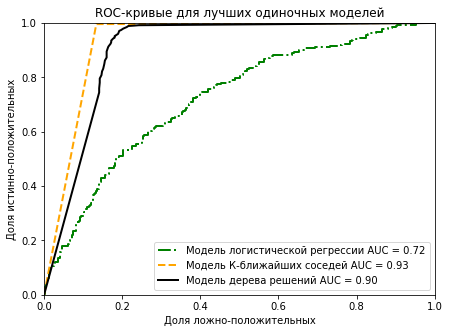

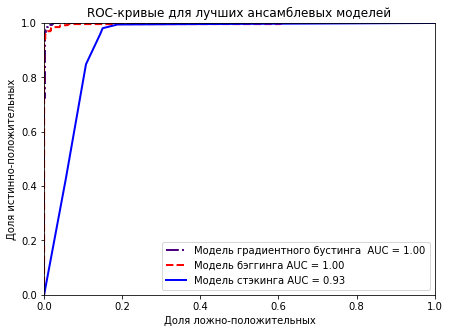

In [ ]:
plt.figure(figsize=(7,5))
plt.title('ROC-кривые для лучших одиночных моделей')
plt.plot(fprlog, tprlog, 'b', color = 'green', linestyle = '-.',
linewidth = 2, label = 'Модель логистической регрессии AUC = %0.2f' % roc_auclog)
plt.plot(fprKNN, tprKNN, 'b', color = 'orange', linestyle = '--',
linewidth = 2, label = 'Модель К-ближайших соседей AUC = %0.2f' % roc_aucKNN)
plt.plot(fprTree, tprTree, 'b', color = 'black', linestyle = '-',
linewidth = 2, label = 'Модель дерева решений AUC = %0.2f' % roc_aucTree)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Доля истинно-положительных')
plt.xlabel('Доля ложно-положительных')

plt.figure(figsize=(7,5))
plt.title('ROC-кривые для лучших ансамблевых моделей')
plt.plot(fprGB, tprGB, 'b', color = 'indigo', linestyle = '-.',
linewidth = 2, label = 'Модель градиентного бустинга  AUC = %0.2f' % roc_aucGB)
plt.plot(fprBAG, tprBAG, 'b', color = 'red', linestyle = '--',
linewidth = 2, label = 'Модель бэггинга AUC = %0.2f' % roc_aucBAG)
plt.plot(fprSTC, tprSTC, 'b', color = 'blue', linestyle = '-',
linewidth = 2, label = 'Модель стэкинга AUC = %0.2f' % roc_aucSTC)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Доля истинно-положительных')
plt.xlabel('Доля ложно-положительных')
plt.show()

#**Выборка 3**

In [ ]:
df_3.isna().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Установили показатели моды для признаков

In [ ]:
g = df_3['glucose'].mode()
b = df_3['BPMeds'].mode()
c = df_3['cigsPerDay'].mode()
t = df_3['totChol'].mode()
e = df_3['education'].mode()

print(g, b, c, t, e)

df_3['glucose'] = df_3['glucose'].fillna(75.0).astype(float)
df_3['cigsPerDay'] = df_3['cigsPerDay'].fillna(0.0).astype(float)
df_3['BPMeds'] = df_3['BPMeds'].fillna(0.0).astype(float)
df_3['totChol'] = df_3['totChol'].fillna(240.0).astype(float)
df_3['education'] = df_3['education'].fillna(1.0).astype(float)

df_3['BPMeds'] = df_3['BPMeds'].astype(int)
df_3['education']= df_3['education'].astype(int)


0    75.0
dtype: float64 0    0.0
dtype: float64 0    0.0
dtype: float64 0    240.0
dtype: float64 0    1.0
dtype: float64


Разделяем категориальные и количественные признаки, а также отобрали значения по перцентилю

In [ ]:
df_3.info()

listOfCategoricalFeatures = []
listOfNumericalFeatures = []

for column in df_3.columns:
    if not (is_float_dtype(df_3[column])):
        print(f'Признак : {column}.')
        print('Значения и их количество в наборе')
        listOfCategoricalFeatures.append(column)
        print(df_3[column].value_counts())
    else:
        listOfNumericalFeatures.append(column)


for column in listOfNumericalFeatures:
    print(column)
    minLimit = df_3[column].quantile(0.050)
    maxLimit = df_3[column].quantile(0.950)
    print(minLimit, maxLimit)
    print(df_3.shape)
    df_3 = df_3.loc[(df_3[column] >= minLimit) & (df_3[column] <= maxLimit)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 529.9 KB
Признак : sex

Выделим из набора данных вектор признаков и вектор ответов

In [ ]:

X_3 = df_3.drop(columns=['TenYearCHD', 'glucose'])
y_3 = df_3['TenYearCHD']

print(f"Features shape: {X_3.shape}")
print(f"Target shape: {y_3.shape}")


Features shape: (2208, 14)
Target shape: (2208,)


Использовали undersampling для балансировки данных

In [ ]:

# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
x_U, y_U = undersample.fit_resample(X_3, y_3)

Создали тренировочную и тестовую выборки

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x_U, y_U, test_size=0.3)

print(X_train_3.shape)
print(X_test_3.shape)

(387, 14)
(167, 14)


Применяем модели

**Логистическая регрессия 3 выборка**

In [ ]:
# Создадим модель логистической регрессии

param_grid = {'C': np.logspace(-4, 4, 50),
'penalty': ['l1', 'l2']}
LogModel = GridSearchCV(LogisticRegression(random_state = 10), param_grid, cv = 5, verbose = 0, n_jobs = -1)

# обучение модели
LogModel.fit(X_train_3, y_train_3)

# предсказание ответов для тестовой выборки
answers_pred = LogModel.predict(X_test_3)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
confmat_log=confusion_matrix(y_true=y_test_3,y_pred=answers_pred)
print('Матрица ошибок для логистической регрессии:') 
print(confmat_log) 
specificity_log = confmat_log[1][1]/(confmat_log[1][0] + confmat_log[1][1]) 
sensitivity_log = confmat_log[0][0]/(confmat_log[0][0] + confmat_log[0][1])

print(r'Чувствительность (Логистическая регрессия): %.3f'%sensitivity_log) 
print(r'Специфичность    (Логистическая регрессия): %.3f'%specificity_log) 
probslog = LogModel.predict_proba(X_test_3) 
predslog = probslog[:,1] 
fprlog, tprlog, thresholdTree = roc_curve(y_test_3, predslog) 
roc_auclog = auc(fprlog, tprlog) 
print(r'AUC              (Логистическая регрессия): %.3f'%roc_auclog) 

print(classification_report(y_test_3, answers_pred, target_names=hcd_names))


log_acc_3 = accuracy_score(y_test_3, answers_pred)
print(accuracy_score(y_test_3, answers_pred))

Матрица ошибок для логистической регрессии:
[[54 34]
 [29 50]]
Чувствительность (Логистическая регрессия): 0.614
Специфичность    (Логистическая регрессия): 0.633
AUC              (Логистическая регрессия): 0.679
              precision    recall  f1-score   support

          No       0.65      0.61      0.63        88
         Yes       0.60      0.63      0.61        79

    accuracy                           0.62       167
   macro avg       0.62      0.62      0.62       167
weighted avg       0.62      0.62      0.62       167

0.6227544910179641


**SVC с 3 выборкой**

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
svm = GridSearchCV(SVC(random_state=10), param_grid, refit = True, verbose = 3, n_jobs = -1)

svm.fit(X_train_3, y_train_3)
y_pred_svm = svm.predict(X_test_3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:

print(classification_report(y_test_3, y_pred_svm, target_names=hcd_names))

confmat=confusion_matrix(y_true=y_test_3,y_pred=y_pred_svm)
print('Матрица ошибок для Опорные вектора:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Опорные вектора): %.3f'%sensitivity) 
print(r'Специфичность    (Опорные вектора): %.3f'%specificity) 

svm_acc_3 = accuracy_score(y_test_3, y_pred_svm)
print(accuracy_score(y_test_3, y_pred_svm))

              precision    recall  f1-score   support

          No       0.88      0.80      0.83        88
         Yes       0.79      0.87      0.83        79

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.84      0.83      0.83       167

Матрица ошибок для Опорные вектора:
[[70 18]
 [10 69]]
Чувствительность (Опорные вектора): 0.795
Специфичность    (Опорные вектора): 0.873
0.8323353293413174


**KNN с 3 выборкой**

In [ ]:
grid_params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 3, verbose = 4, n_jobs = -1)
  
knn.fit(X_train_3, y_train_3)
  
# Calculate the accuracy of the model
print(knn.score(X_test_3, y_test_3))
y_pred_knn = knn.predict(X_test_3)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
0.8562874251497006


In [ ]:
confmat_knn=confusion_matrix(y_true=y_test_3,y_pred=y_pred_knn)
print('Матрица ошибок для KNN:') 
print(confmat_log) 
specificity_knn = confmat_knn[1][1]/(confmat_knn[1][0] + confmat_knn[1][1]) 
sensitivity_knn = confmat_knn[0][0]/(confmat_knn[0][0] + confmat_knn[0][1])

print(r'Чувствительность (KNN): %.3f'%sensitivity_knn) 
print(r'Специфичность    (KNN): %.3f'%specificity_knn) 
probsKNN = knn.predict_proba(X_test_3) 
predsKNN = probsKNN[:,1] 
fprKNN, tprKNN, thresholdTree = roc_curve(y_test_3, predsKNN) 
roc_aucKNN = auc(fprKNN, tprKNN) 
print(r'AUC              (KNN): %.3f'%roc_aucKNN)

print(classification_report(y_test_3, y_pred_knn, target_names=hcd_names))

knn_acc_3 = accuracy_score(y_test_3, y_pred_knn)
print(accuracy_score(y_test_3, y_pred_knn))

Матрица ошибок для KNN:
[[54 34]
 [29 50]]
Чувствительность (KNN): 0.955
Специфичность    (KNN): 0.747
AUC              (KNN): 0.896
              precision    recall  f1-score   support

          No       0.81      0.95      0.88        88
         Yes       0.94      0.75      0.83        79

    accuracy                           0.86       167
   macro avg       0.87      0.85      0.85       167
weighted avg       0.87      0.86      0.85       167

0.8562874251497006


**Decision Tree с 3 выборкой**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, 000.1],
              'max_depth' : [5,10,20,40,100,150,200,500,1000],
              'criterion' :['gini', 'entropy'],
             }

Tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
  
Tree.fit(X_train_3, y_train_3)
  
# Calculate the accuracy of the model
print(Tree.score(X_test_3, y_test_3))

y_pred_tree = Tree.predict(X_test_3)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
0.7365269461077845


In [ ]:

confmat=confusion_matrix(y_true=y_test_3,y_pred=y_pred_tree)
print('Матрица ошибок для Decision Tree:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Decision Tree): %.3f'%sensitivity) 
print(r'Специфичность    (Decision Tree): %.3f'%specificity) 
probs = Tree.predict_proba(X_test_3) 
preds = probs[:,1] 
fprTree, tprTree, thresholdTree = roc_curve(y_test_3, preds) 
roc_aucTree = auc(fprTree, tprTree) 
print(r'AUC              (Decision Tree): %.3f'%roc_aucTree)

print(classification_report(y_test_3, y_pred_tree, target_names=hcd_names))

tree_acc_3 = accuracy_score(y_test_3, y_pred_tree)
print(accuracy_score(y_test_3, y_pred_tree))

Матрица ошибок для Decision Tree:
[[61 27]
 [17 62]]
Чувствительность (Decision Tree): 0.693
Специфичность    (Decision Tree): 0.785
AUC              (Decision Tree): 0.802
              precision    recall  f1-score   support

          No       0.78      0.69      0.73        88
         Yes       0.70      0.78      0.74        79

    accuracy                           0.74       167
   macro avg       0.74      0.74      0.74       167
weighted avg       0.74      0.74      0.74       167

0.7365269461077845


**Gradient Boosting с 3 выборкой**

In [ ]:

grid_param = {'n_estimators':[25,28,31,34,37],'max_depth':[2,5,8,11,14]}

modelGB_3 = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param, verbose=True, n_jobs = -1)

modelGB_3.fit(X_train_3, y_train_3)
print(modelGB_3.score(X_test_3, y_test_3))

y_pred_GB_3 = modelGB_3.predict(X_test_3)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0.874251497005988


In [ ]:

confmat=confusion_matrix(y_true=y_test_3,y_pred=y_pred_GB_3)
print('Матрица ошибок для Gradient Boosting:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Gradient Boosting): %.3f'%sensitivity) 
print(r'Специфичность    (Gradient Boosting): %.3f'%specificity) 
probs = modelGB_3.predict_proba(X_test_3) 
preds = probs[:,1] 
fprGB, tprGB, thresholdTree = roc_curve(y_test_3, preds) 
roc_aucGB = auc(fprGB, tprGB) 
print(r'AUC              (Gradient Boosting): %.3f'%roc_aucGB)

print(classification_report(y_test_3, y_pred_GB_3, target_names=hcd_names))

GB_acc_3 = accuracy_score(y_test_3, y_pred_GB_3)
print(accuracy_score(y_test_3, y_pred_GB_3))

Матрица ошибок для Gradient Boosting:
[[87  1]
 [20 59]]
Чувствительность (Gradient Boosting): 0.989
Специфичность    (Gradient Boosting): 0.747
AUC              (Gradient Boosting): 0.917
              precision    recall  f1-score   support

          No       0.81      0.99      0.89        88
         Yes       0.98      0.75      0.85        79

    accuracy                           0.87       167
   macro avg       0.90      0.87      0.87       167
weighted avg       0.89      0.87      0.87       167

0.874251497005988


**Bagging с 3 выборкой**

In [ ]:
bc_params = {"base_estimator__n_neighbors": [2,5,10],
          'bootstrap_features': [False, True],
          'n_estimators': [5, 150],
          }


modelBAG_3 = GridSearchCV(BaggingClassifier(KNeighborsClassifier()), bc_params, cv=5, verbose=1, n_jobs = -1)

modelBAG_3.fit(X_train_3, y_train_3)
print(modelBAG_3.score(X_test_3, y_test_3))

y_pred_BAG_3 = modelBAG_3.predict(X_test_3)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8502994011976048


In [ ]:

confmat=confusion_matrix(y_true=y_test_3,y_pred=y_pred_BAG_3)
print('Матрица ошибок для Bagging:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Bagging): %.3f'%sensitivity) 
print(r'Специфичность    (Bagging): %.3f'%specificity) 
probs = modelBAG_3.predict_proba(X_test_3) 
preds = probs[:,1] 
fprBAG, tprBAG, thresholdTree = roc_curve(y_test_3, preds) 
roc_aucBAG = auc(fprBAG, tprBAG) 
print(r'AUC              (Bagging): %.3f'%roc_aucBAG)

print(classification_report(y_test_3, y_pred_BAG_3, target_names=hcd_names))

BAG_acc_3 = accuracy_score(y_test_3, y_pred_BAG_3)
print(accuracy_score(y_test_3, y_pred_BAG_3))

Матрица ошибок для Bagging:
[[81  7]
 [18 61]]
Чувствительность (Bagging): 0.920
Специфичность    (Bagging): 0.772
AUC              (Bagging): 0.912
              precision    recall  f1-score   support

          No       0.82      0.92      0.87        88
         Yes       0.90      0.77      0.83        79

    accuracy                           0.85       167
   macro avg       0.86      0.85      0.85       167
weighted avg       0.86      0.85      0.85       167

0.8502994011976048


**Stacking с 3 выборкой**

In [ ]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
modelClf_3 = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())


params = {'dt__max_depth': [10, 50, 150],
          'dt__criterion':['gini', 'entropy'],
          'lr__C': [0.1, 1, 10, 100],
          }

modelClf_3 = GridSearchCV(estimator=modelClf_3, param_grid=params, cv=5, verbose=1, n_jobs= -1)

modelClf_3.fit(X_train_3, y_train_3)
print(modelClf_3.score(X_test_3, y_test_3))
y_pred_Clf_3 = modelClf_3.predict(X_test_3)

In [ ]:

confmat=confusion_matrix(y_true=y_test_3,y_pred=y_pred_Clf_3)
print('Матрица ошибок для Stacking:') 
print(confmat) 
specificity = confmat[1][1]/(confmat[1][0] + confmat[1][1]) 
sensitivity = confmat[0][0]/(confmat[0][0] + confmat[0][1])

print(r'Чувствительность (Stacking): %.3f'%sensitivity) 
print(r'Специфичность    (Stacking): %.3f'%specificity) 
probs = modelClf_3.predict_proba(X_test_3) 
preds = probs[:,1] 
fprSTC, tprSTC, thresholdTree = roc_curve(y_test_3, preds) 
roc_aucSTC = auc(fprSTC, tprSTC) 
print(r'AUC              (Stacking): %.3f'%roc_aucSTC)

print(classification_report(y_test_3, y_pred_Clf_3, target_names=hcd_names))


STC_acc_3 = accuracy_score(y_test_3, y_pred_Clf_3)
print(accuracy_score(y_test_3, y_pred_Clf_3))

Матрица ошибок для Stacking:
[[82  6]
 [17 62]]
Чувствительность (Stacking): 0.932
Специфичность    (Stacking): 0.785
AUC              (Stacking): 0.884
              precision    recall  f1-score   support

          No       0.83      0.93      0.88        88
         Yes       0.91      0.78      0.84        79

    accuracy                           0.86       167
   macro avg       0.87      0.86      0.86       167
weighted avg       0.87      0.86      0.86       167

0.8622754491017964


Графики ROC для моделей

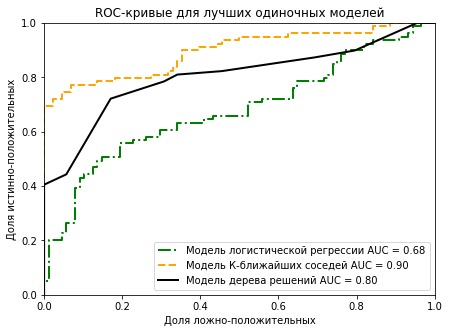

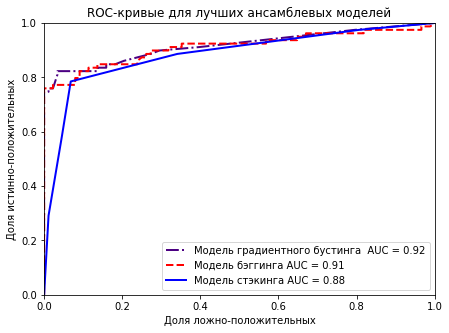

In [ ]:
plt.figure(figsize=(7,5))
plt.title('ROC-кривые для лучших одиночных моделей')
plt.plot(fprlog, tprlog, 'b', color = 'green', linestyle = '-.',
linewidth = 2, label = 'Модель логистической регрессии AUC = %0.2f' % roc_auclog)
plt.plot(fprKNN, tprKNN, 'b', color = 'orange', linestyle = '--',
linewidth = 2, label = 'Модель К-ближайших соседей AUC = %0.2f' % roc_aucKNN)
plt.plot(fprTree, tprTree, 'b', color = 'black', linestyle = '-',
linewidth = 2, label = 'Модель дерева решений AUC = %0.2f' % roc_aucTree)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Доля истинно-положительных')
plt.xlabel('Доля ложно-положительных')

plt.figure(figsize=(7,5))
plt.title('ROC-кривые для лучших ансамблевых моделей')
plt.plot(fprGB, tprGB, 'b', color = 'indigo', linestyle = '-.',
linewidth = 2, label = 'Модель градиентного бустинга  AUC = %0.2f' % roc_aucGB)
plt.plot(fprBAG, tprBAG, 'b', color = 'red', linestyle = '--',
linewidth = 2, label = 'Модель бэггинга AUC = %0.2f' % roc_aucBAG)
plt.plot(fprSTC, tprSTC, 'b', color = 'blue', linestyle = '-',
linewidth = 2, label = 'Модель стэкинга AUC = %0.2f' % roc_aucSTC)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Доля истинно-положительных')
plt.xlabel('Доля ложно-положительных')
plt.show()

#Выводы

In [ ]:

res_cd_1 = pd.DataFrame({
    'Accuracy': [log_acc_1, svm_acc_1, knn_acc_1, tree_acc_1, GB_acc_1, BAG_acc_1, STC_acc_1],
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Bagging', 'Stacking']
})

res_cd_1

res_cd_2 = pd.DataFrame({
    'Accuracy': [log_acc_2, svm_acc_2, knn_acc_2, tree_acc_2, GB_acc_2, BAG_acc_2, STC_acc_2],
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Bagging', 'Stacking']
})

res_cd_2

res_cd_3 = pd.DataFrame({
    'Accuracy': [log_acc_3, svm_acc_3, knn_acc_3, tree_acc_3, GB_acc_3, BAG_acc_3, STC_acc_3],
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Bagging', 'Stacking']
})

res_cd_3




,Accuracy,Model
0,0.622754,Logistic Regression
1,0.832335,SVM
2,0.856287,KNN
3,0.736527,Decision Tree
4,0.874251,Gradient Boosting
5,0.850299,Bagging
6,0.862275,Stacking


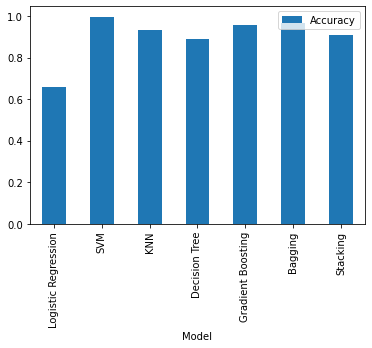

In [ ]:
res_cd_2.plot.bar('Model','Accuracy')

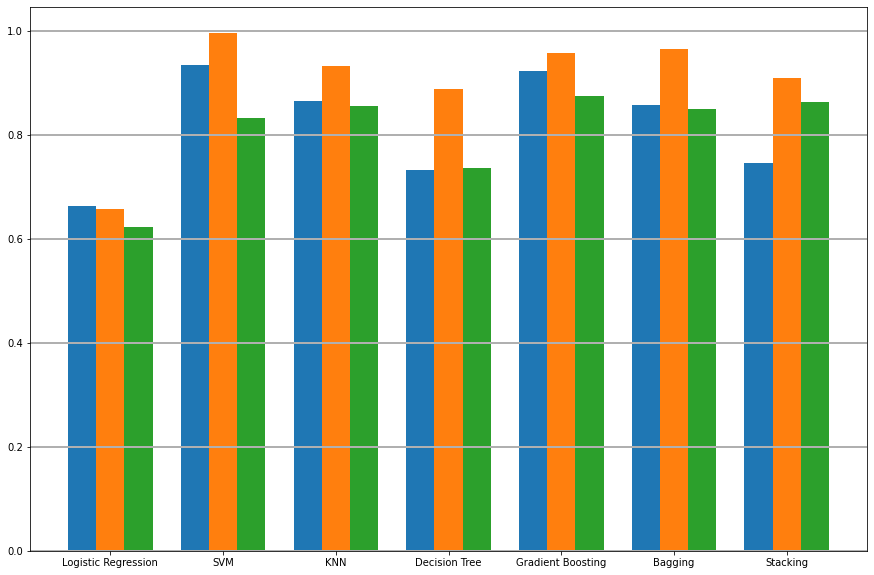

In [ ]:
x1 = np.arange(1, 8) - 0.25
x2 = np.arange(1, 8) + 0.0
x3 = np.arange(1, 8) + 0.25

y1 = res_cd_1['Accuracy']
y2 = res_cd_2['Accuracy']
y3 = res_cd_3['Accuracy']

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.25, label='1')
ax.bar(x2, y2, width = 0.25, tick_label = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Bagging', 'Stacking'])
ax.bar(x3, y3, width = 0.25)

fig.set_figwidth(15)
fig.set_figheight(10)

ax.grid(axis = 'y', linewidth = 2)

plt.show()

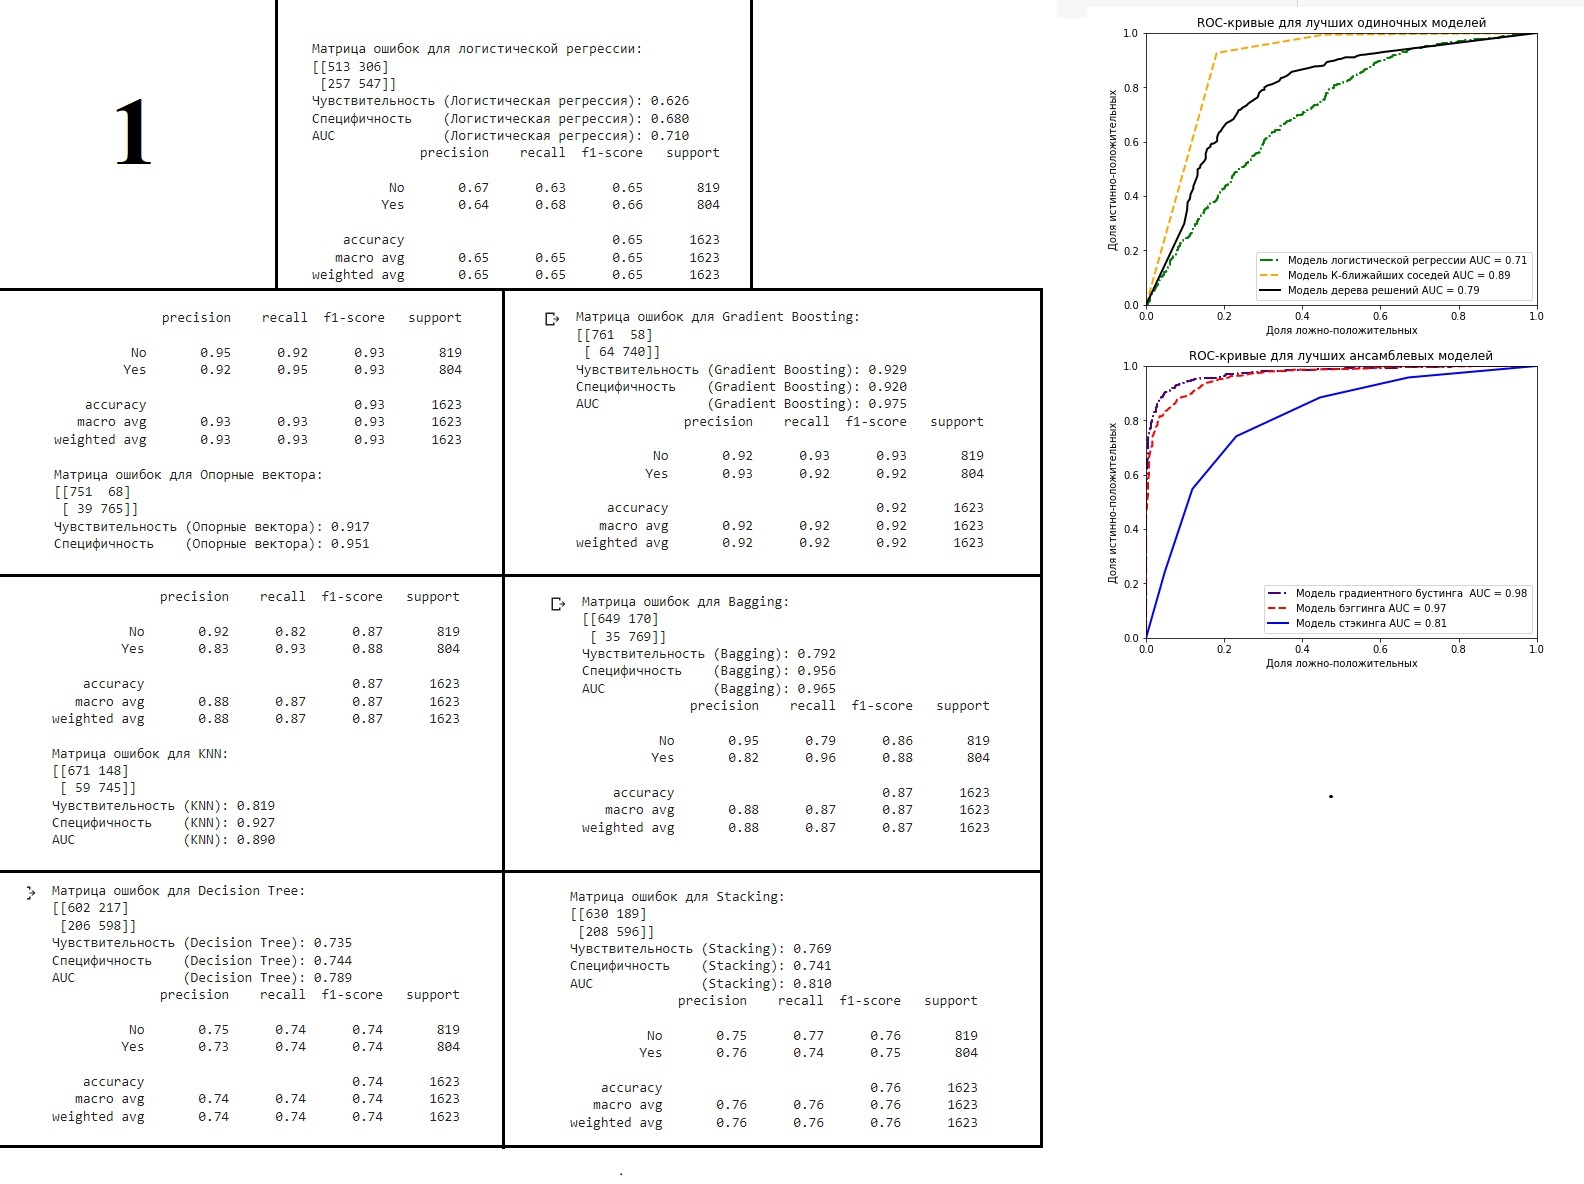

- В 1 выборке наилучшие показатели проявляет Метод опорных векторов.



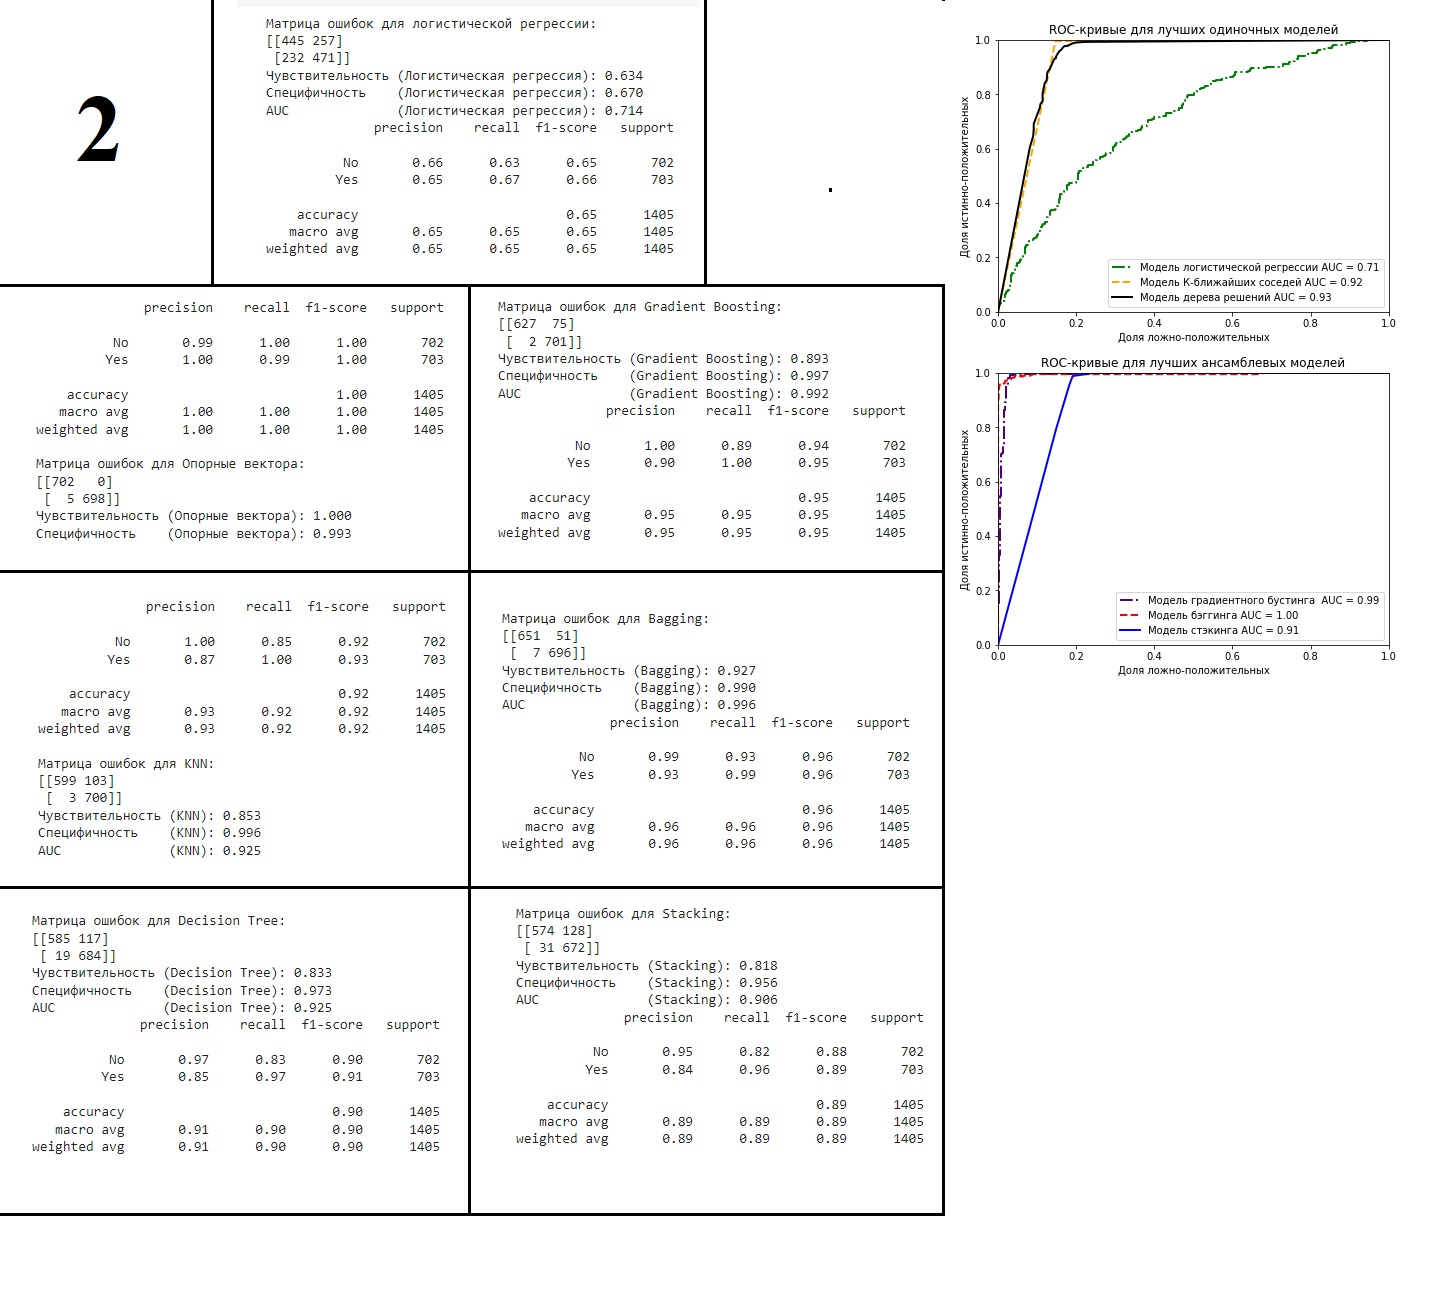

- Во 2 выборке наилучшие показатели также проявляет Метод опорных векторов.

- Такой результат мог возникнуть поскольку методы обработки данных для 1 и 2 пересекаются в некоторых моментах, несмотря на различия.

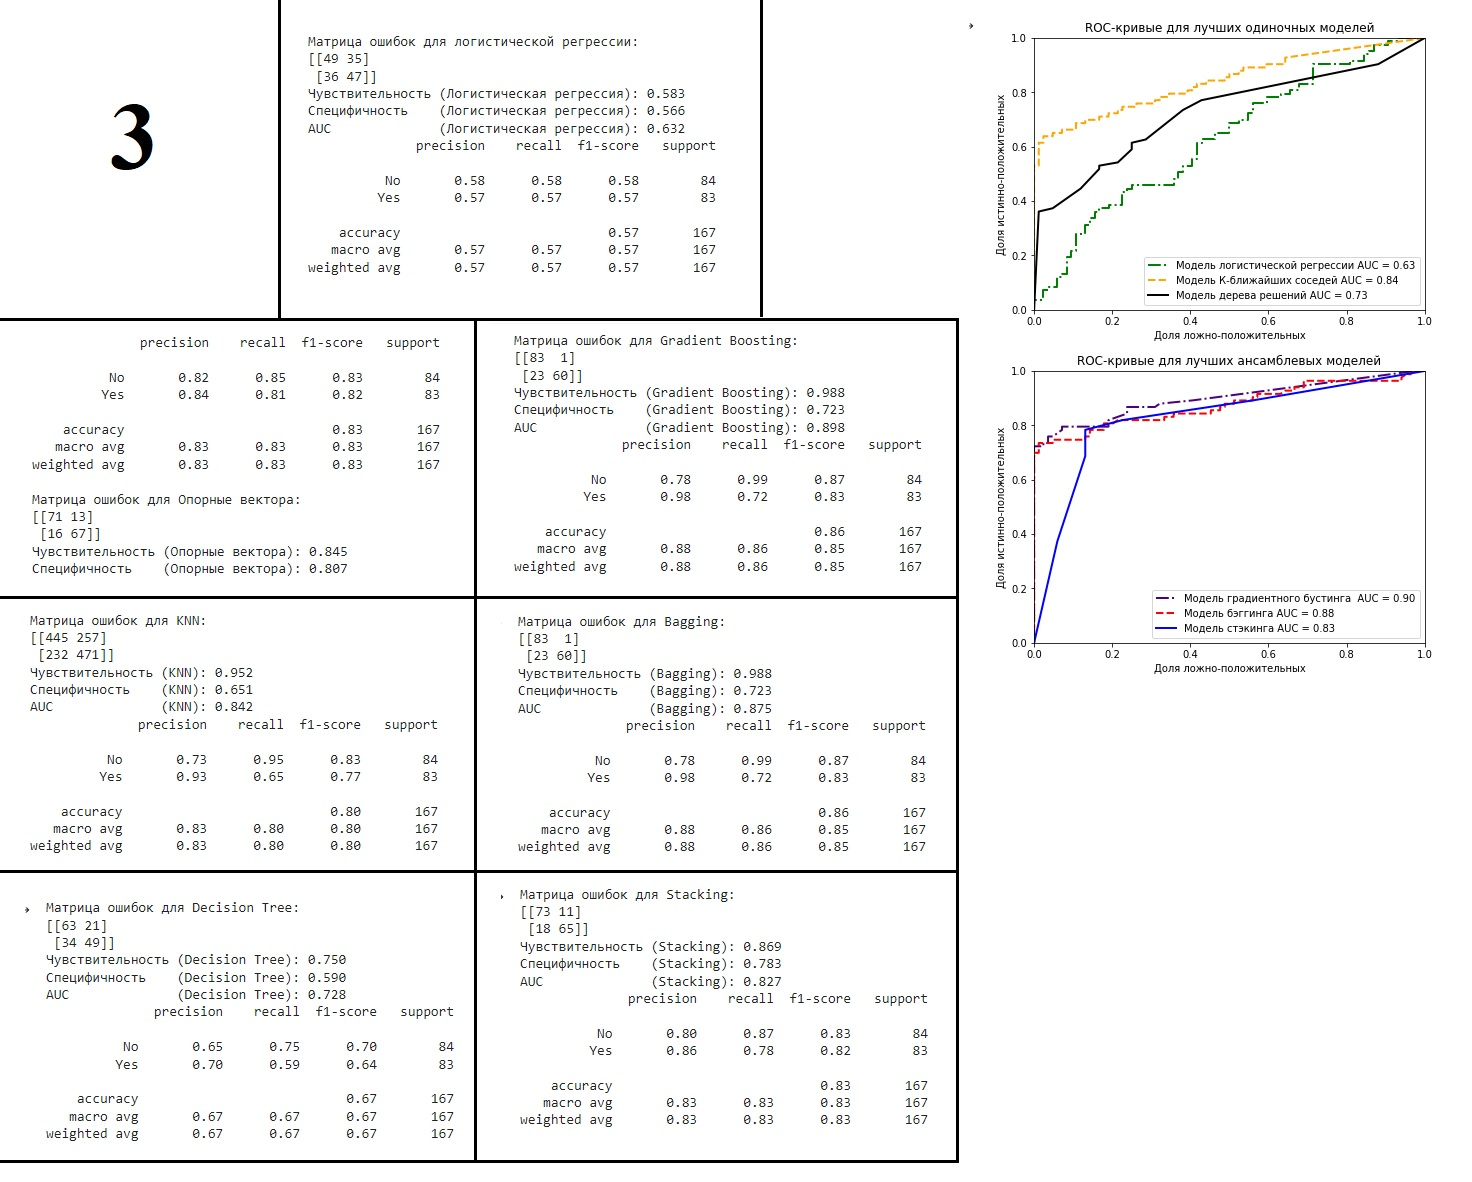

- В 3 выборке наилучшие показатели проявил Градиенитный бустинг

**Общий результат**

Самой **лучшей моделью оказался Метод опорных векторов** во 2 выборке, такие показатели связаны с грамотным подбором гиперпараметров, которые позволили натренировать модель наилучшим образом

Наихудшей моделью стала логистическая регрессия, это возможно вследствие не подходящего набора гиперпараметров или указания недостаточного их количества, а также с тем что иные модели лучше справляются с имеющийся выборкой

**Самая лучшая = 2 Выборка** также имеет наибольшие значения метрик, это связанно в первую очередь с тем что способ полного удаления пропусков, а также балансировка классов путем передискретизации с заменой позволили 

**1 Выборка** имеет **средние показатели**, поскольку обработка данных во 2 выборке имеет больше схожих приемов, чем в 3 выборке

**Наихудшие показатели** в целом проявила **3 выборка**, поскольку удаление признаков и балансировка классов путем минимизации привели к тому что количество данных необходимых для моделей оказалось недостаточным, чтобы сделать хорошие прогнозы